# 가장 큰 이스포츠 대회는 무엇일까?
* 출전 선수가 가장 많은 대회는 무엇일까?
* 총 상금이 많은 게임은 무엇일까?

## 라이브러리, 데이터 import
* 데이터 출처 : https://www.kaggle.com/datasets/jackdaoud/esports-earnings-for-players-teams-by-game?select=country-and-continent-codes-list.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

# %matplotlib inline
plt.rc('font', family= 'Malgun Gothic')

country= pd.read_csv('country-and-continent-codes-list.csv')
players= pd.read_csv('highest_earning_players.csv')
teams= pd.read_csv('highest_earning_teams.csv')

print(country.shape, players.shape, teams.shape)

(262, 6) (1000, 8) (928, 6)


## 데이터 확인

In [2]:
country.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


In [3]:
players.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [4]:
teams.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter


In [5]:
country.isna().sum()

Continent_Name                0
Continent_Code               43
Country_Name                  0
Two_Letter_Country_Code       1
Three_Letter_Country_Code     4
Country_Number                4
dtype: int64

In [6]:
players.isna().sum()

PlayerId         0
NameFirst        0
NameLast         0
CurrentHandle    0
CountryCode      0
TotalUSDPrize    0
Game             0
Genre            0
dtype: int64

In [7]:
teams.isna().sum()

TeamId              0
TeamName            0
TotalUSDPrize       0
TotalTournaments    0
Game                0
Genre               0
dtype: int64

## 1. 출전 선수 수가 가장 많은 대회는 무엇일까?

### 1. 장르에 따른 출전 국가, 팀, 선수 수

In [8]:
# 플레이어 수
player_cnt= players.groupby('Genre')['PlayerId'].nunique().reset_index().rename(columns= {'PlayerId' : 'Players'})

# 국가 수
country_cnt= players.groupby('Genre')['CountryCode'].nunique().reset_index().rename(columns= {'CountryCode' : 'Countries'})

# 팀 수
team_cnt= teams.groupby('Genre')['TeamId'].nunique().reset_index().rename(columns= {'TeamId' : 'Teams'})

In [9]:
player_cnt

,Genre,Players
0,Battle Royale,200
1,Collectible Card Game,100
2,First-Person Shooter,200
3,Multiplayer Online Battle Arena,400
4,Strategy,100


In [10]:
country_cnt

,Genre,Countries
0,Battle Royale,30
1,Collectible Card Game,26
2,First-Person Shooter,29
3,Multiplayer Online Battle Arena,36
4,Strategy,18


In [11]:
team_cnt

,Genre,Teams
0,Battle Royale,176
1,Collectible Card Game,80
2,First-Person Shooter,177
3,Multiplayer Online Battle Arena,260
4,Strategy,100


In [12]:
genre_cnt= pd.merge(left= country_cnt, right= team_cnt, on= 'Genre', how= 'left')
genre_cnt= pd.merge(left= genre_cnt, right= player_cnt, on= 'Genre', how= 'left').sort_values(by= 'Players', ascending= False)
genre_cnt

,Genre,Countries,Teams,Players
3,Multiplayer Online Battle Arena,36,260,400
0,Battle Royale,30,176,200
2,First-Person Shooter,29,177,200
1,Collectible Card Game,26,80,100
4,Strategy,18,100,100


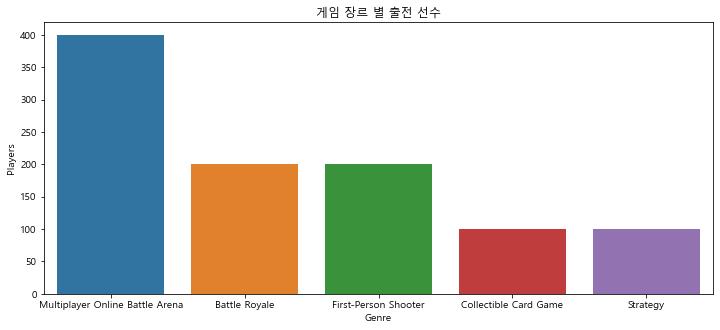

In [13]:
plt.figure(figsize= (12, 5))
plt.title('게임 장르 별 출전 선수', fontsize= 12)
sns.barplot(data= genre_cnt, x= 'Genre', y= 'Players')
plt.show()

* 출전 선수 기준으로 볼 때 MOBA 게임 대회의 규모가 압도적으로 큼
* 카드, 전략 게임 출전 선수 수는 같지만 출전 국가, 팀 수는 차이를 보임

### 2. 게임에 따른 대회 규모

In [14]:
# 선수
player_cnt= players.groupby(['Game', 'Genre'])['PlayerId'].nunique().reset_index().rename(columns= {'PlayerId' : 'Players'})
# 팀
team_cnt= teams.groupby(['Game', 'Genre'])['TeamId'].nunique().reset_index().rename(columns= {'TeamId' : 'Teams'})
# 국가
country_cnt= players.groupby(['Game', 'Genre'])['CountryCode'].nunique().reset_index().rename(columns= {'CountryCode' : 'Countries'})

In [15]:
game_cnt= pd.merge(left= country_cnt, right= team_cnt, on= 'Game', how= 'left')
game_cnt= pd.merge(left= game_cnt, right= player_cnt, on= 'Game', how= 'left').sort_values(by= 'Players', ascending= False)

game_cnt.drop(['Genre_y', 'Genre'], axis= 1, inplace= True)

game_cnt.rename(columns= {'Genre_x' : 'Genre'}, inplace= True)

# 선수 수가 모두 100명이므로 국가 수 기준으로 정렬
game_cnt= game_cnt.sort_values(by= 'Countries', ascending= False)

game_cnt

,Game,Genre,Countries,Teams,Players
2,Dota 2,Multiplayer Online Battle Arena,26,100,100
4,Hearthstone,Collectible Card Game,26,80,100
1,Counter-Strike: Global Offensive,First-Person Shooter,25,100,100
8,PUBG,Battle Royale,22,100,100
3,Fortnite,Battle Royale,21,100,100
9,Starcraft II,Strategy,18,100,100
5,Heroes of the Storm,Multiplayer Online Battle Arena,16,100,100
6,League of Legends,Multiplayer Online Battle Arena,16,100,100
7,Overwatch,First-Person Shooter,14,100,100
0,Arena of Valor,Multiplayer Online Battle Arena,7,48,100


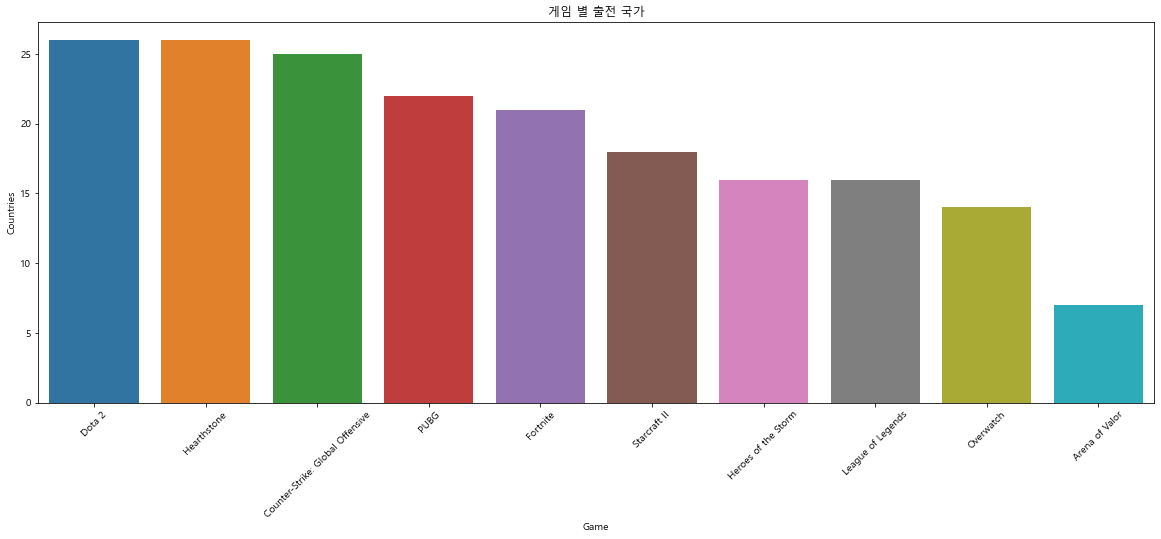

In [16]:
plt.figure(figsize= (20, 7))
plt.title('게임 별 출전 국가', fontsize= 12)
plt.xticks(rotation= 45)
sns.barplot(data= game_cnt, x= 'Game', y= 'Countries')
plt.show()

* 앞선 결과와는 다른 결과를 보임
* MOBA 게임 도타 2, 카드 게임 하스스톤 대회 참가국이 26개로 가장 많음
* MOBA 대부분 타 장르 게임보다 참가국이 적음
* 히어로즈 오브 더 스톰과 롤 참가국이 같은 것은 의외임
* 제작사의 규모가 커도 대회 참가국이 적을 수도 있다는 것 확인

### 2-1. 게임별 출전 대륙의 비율은 어떻게될까?

In [17]:
players_1= players[['CountryCode', 'Game', 'Genre']]
country_1= country[['Continent_Code', 'Two_Letter_Country_Code']]

country_1['Two_Letter_Country_Code']= country_1.Two_Letter_Country_Code.str.lower()
country_1= country_1.rename(columns= {'Two_Letter_Country_Code' : 'CountryCode'})

country_1.head()

,Continent_Code,CountryCode
0,AS,af
1,EU,al
2,AN,aq
3,AF,dz
4,OC,as


In [18]:
players_1= pd.merge(left= players_1, right= country_1, on= 'CountryCode', how= 'left')

players_1.head()

,CountryCode,Game,Genre,Continent_Code
0,dk,Counter-Strike: Global Offensive,First-Person Shooter,EU
1,dk,Counter-Strike: Global Offensive,First-Person Shooter,EU
2,dk,Counter-Strike: Global Offensive,First-Person Shooter,EU
3,dk,Counter-Strike: Global Offensive,First-Person Shooter,EU
4,dk,Counter-Strike: Global Offensive,First-Person Shooter,EU


In [19]:
players_1[players_1['Continent_Code'].isna()]

,CountryCode,Game,Genre,Continent_Code
5,us,Counter-Strike: Global Offensive,First-Person Shooter,NaN
10,ca,Counter-Strike: Global Offensive,First-Person Shooter,NaN
12,us,Counter-Strike: Global Offensive,First-Person Shooter,NaN
13,us,Counter-Strike: Global Offensive,First-Person Shooter,NaN
18,ca,Counter-Strike: Global Offensive,First-Person Shooter,NaN
...,...,...,...,...
1016,us,Hearthstone,Collectible Card Game,NaN
1020,ca,Hearthstone,Collectible Card Game,NaN
1024,us,Hearthstone,Collectible Card Game,NaN
1028,us,Hearthstone,Collectible Card Game,NaN


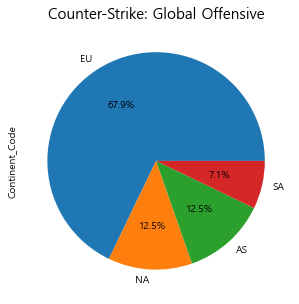

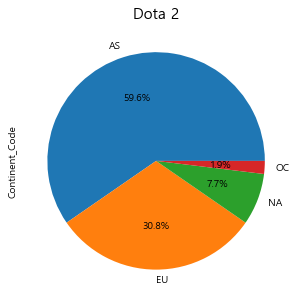

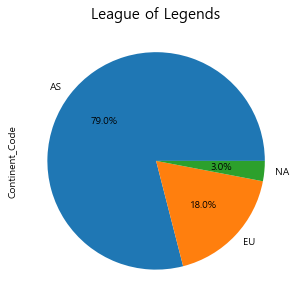

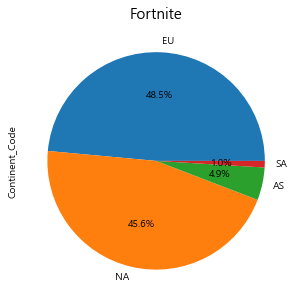

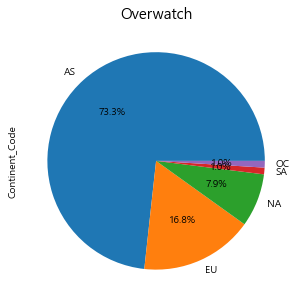

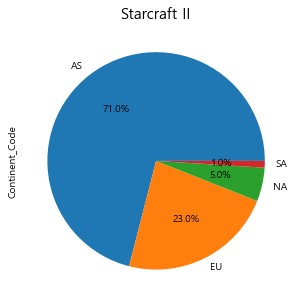

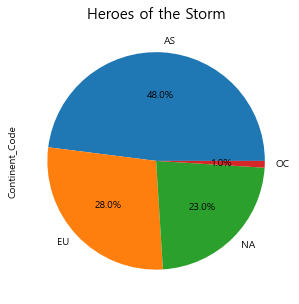

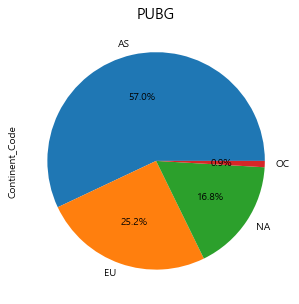

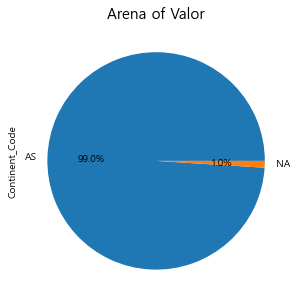

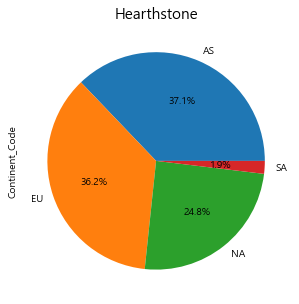

In [20]:
game_list= players_1.Game.unique().tolist()

players_1['Continent_Code'].fillna('NA', inplace= True)
# fig, ax= plt.subplots(5, 2, figsize= (20, 10))

for i in range(0, 10) :
    plt.title(game_list[i], fontsize= 15)
    players_1[players_1['Game']== game_list[i]]['Continent_Code'].value_counts().plot.pie(figsize= (5, 5), autopct= '%1.1f%%')
    plt.show()

* 출전 국가 수 상위 3개 게임을 살펴봄
* 도타2는 아시아, 유럽, 북미 순으로 많이 출전
* 하스스톤은 아시아, 유럽, 북미 순으로 많이 출전
* CS:GO는 유럽, 북미, 아시아 순으로 많이 출전
* 유럽, 북미 선수들은 주로 정통FPS에 많이 출전함, 이 외에도 거의 모든 게임 대회에 출전
* 전략, 하이퍼 FPS 게임에는 아시아 선수들이 주로 출전함

## 2. 총 상금에 따른 규모

In [21]:
prize= players.groupby(['Game', 'Genre'])['TotalUSDPrize'].sum().reset_index().sort_values(by= 'TotalUSDPrize', ascending= False)
prize

,Game,Genre,TotalUSDPrize
2,Dota 2,Multiplayer Online Battle Arena,1.791788e+08
1,Counter-Strike: Global Offensive,First-Person Shooter,5.654192e+07
3,Fortnite,Battle Royale,4.340937e+07
6,League of Legends,Multiplayer Online Battle Arena,3.504348e+07
9,Starcraft II,Strategy,2.537982e+07
4,Hearthstone,Collectible Card Game,1.333564e+07
8,PUBG,Battle Royale,1.244196e+07
7,Overwatch,First-Person Shooter,1.234781e+07
5,Heroes of the Storm,Multiplayer Online Battle Arena,1.178045e+07
0,Arena of Valor,Multiplayer Online Battle Arena,8.333952e+06


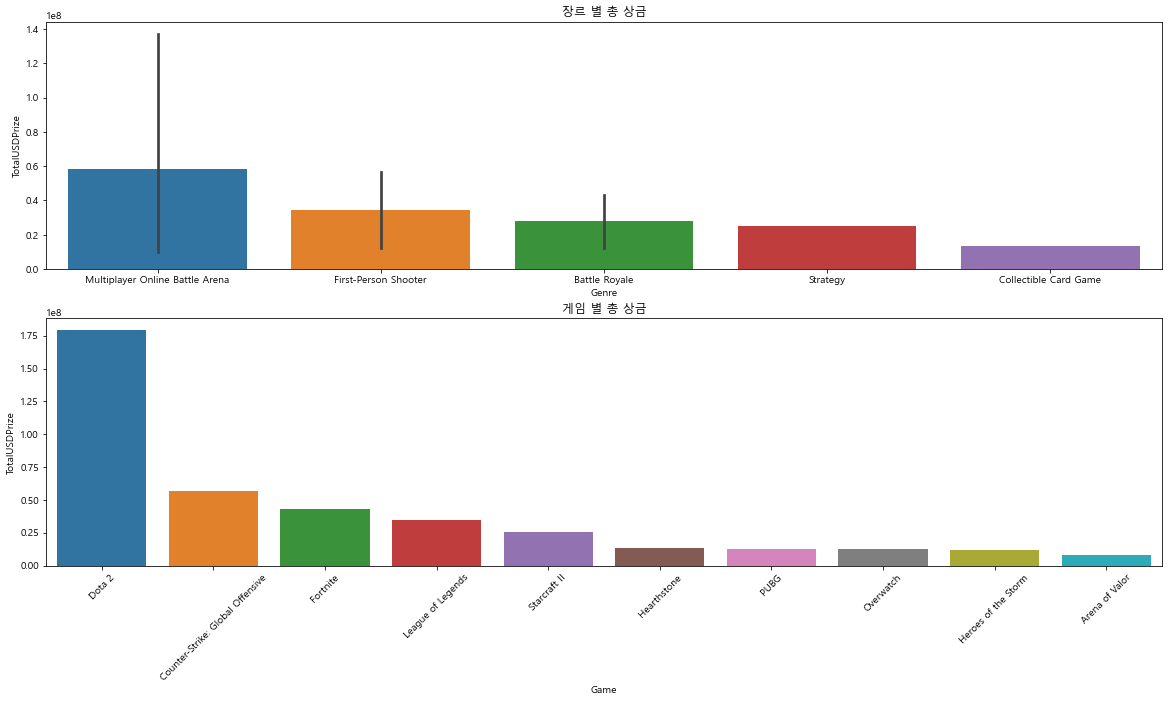

In [22]:
fig, ax= plt.subplots(2, 1, figsize= (20, 10))
plt.xticks(rotation= 45)
a= sns.barplot(data= prize, x= 'Genre', y= 'TotalUSDPrize', ax= ax[0])
a.set_title('장르 별 총 상금', fontsize= 12)

b= sns.barplot(data= prize, x= 'Game', y= 'TotalUSDPrize', ax= ax[1])
b.set_title('게임 별 총 상금', fontsize= 12)

plt.show()

* 장르별로 살펴본 경우 출전 선수와 총 상금이 유사한 현상을 보임
* 하지만 게임별로 집계하면 출전 국가 수 2위였던 하스스톤이 총 상금 하위권을 기록함
* 히어로즈 오브 더 스톰이 출전 국가 수는 롤보다 많았지만 총 상금은 압도적으로 적음
* 게임 제작사의 규모가 크다고 대회 총 상금이 크다는 것은 아닌 것 확인

## 결론
* 유럽, 북미 국가의 주력 게임(FPS, 배틀로얄)대회의 상금 규모가 큼
* 아시아 국가들이 참여한 대회는 참가국은 많지만 상금은 비교적 적음
* 도타 2는 The International 시즌 인게임 아이템 판매로 인해 타 게임들보다 상금 규모가 압도적으로 큼

# E-Sports 강국은 어느 나라일까?
* 상금을 기준으로 판별

### 1. 국가별 획득 상금

In [23]:
players_1= players[['PlayerId', 'CountryCode', 'TotalUSDPrize']]

country_1= country[['Continent_Name', 'Continent_Code', 'Two_Letter_Country_Code', 'Country_Name']]
country_1.rename(columns= {'Two_Letter_Country_Code' : 'CountryCode'}, inplace= True)
country_1['CountryCode']= country_1['CountryCode'].str.lower()

country_prize= pd.merge(left= players_1, right= country_1, on= 'CountryCode', how= 'left')

country_prize.head()

,PlayerId,CountryCode,TotalUSDPrize,Continent_Name,Continent_Code,Country_Name
0,3883,dk,1822989.41,Europe,EU,"Denmark, Kingdom of"
1,3679,dk,1799288.57,Europe,EU,"Denmark, Kingdom of"
2,3885,dk,1787489.88,Europe,EU,"Denmark, Kingdom of"
3,3672,dk,1652350.75,Europe,EU,"Denmark, Kingdom of"
4,17800,dk,1416448.64,Europe,EU,"Denmark, Kingdom of"


In [24]:
country_prize= country_prize.groupby('Country_Name')['TotalUSDPrize'].sum().reset_index()
country_prize.rename(columns= {'TotalUSDPrize' : 'TotalPrize'}, inplace= True)
country_prize= country_prize.sort_values(by= 'TotalPrize', ascending= False)

country_prize

,Country_Name,TotalPrize
9,"China, People's Republic of",72391878.56
27,"Korea, Republic of",58441733.71
53,United States of America,43099381.78
13,"Denmark, Kingdom of",26840800.02
41,Russian Federation,21645785.42
46,"Sweden, Kingdom of",20770423.01
15,"Finland, Republic of",18876262.25
16,"France, French Republic",15803240.18
8,Canada,13483648.61
17,"Germany, Federal Republic of",10143181.56


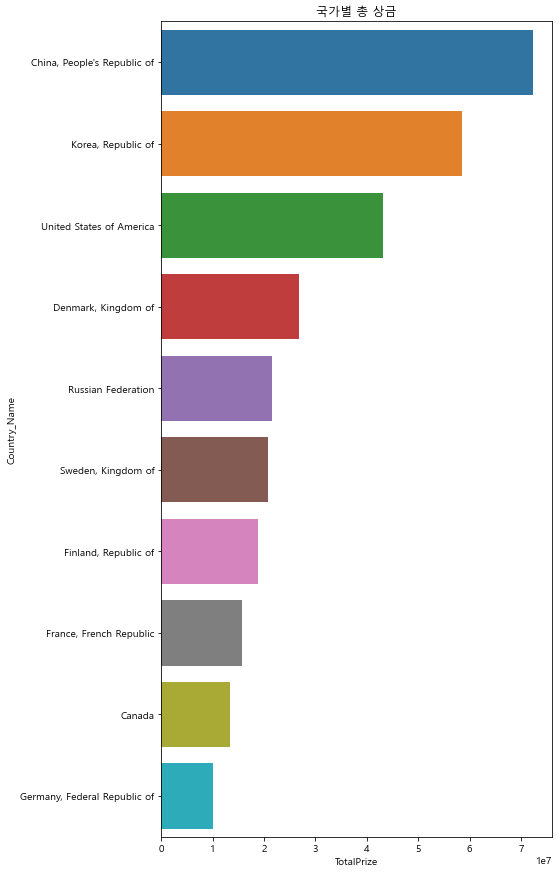

In [25]:
plt.figure(figsize= (7, 15))
plt.title('국가별 총 상금', fontsize= 12)
sns.barplot(data= country_prize.head(10), x= 'TotalPrize', y= 'Country_Name')
plt.show()

* 단순 총 상금은 중국, 한국, 미국 순으로 많음
* 국가 당 출전 팀 별 평균 상금을 집계해야할 듯 함

### 2. 국가별 평균 상금 (1인당)

In [26]:
players_1= players[['PlayerId', 'CountryCode', 'TotalUSDPrize']]

country_1= country[['Country_Name', 'Two_Letter_Country_Code']]
country_1.rename(columns= {'Country_Name' : 'Country', 'Two_Letter_Country_Code' : 'CountryCode'}, inplace= True)
country_1['CountryCode']= country_1.CountryCode.str.lower()

players_1= pd.merge(left= players_1, right= country_1, on= 'CountryCode', how= 'left')

players_1.head()

,PlayerId,CountryCode,TotalUSDPrize,Country
0,3883,dk,1822989.41,"Denmark, Kingdom of"
1,3679,dk,1799288.57,"Denmark, Kingdom of"
2,3885,dk,1787489.88,"Denmark, Kingdom of"
3,3672,dk,1652350.75,"Denmark, Kingdom of"
4,17800,dk,1416448.64,"Denmark, Kingdom of"


In [27]:
# 국가 당 출전 선수 수
player_cnt= players_1.groupby('Country')['PlayerId'].nunique().reset_index()
# 국가 당 총 상금
total_prize= players_1.groupby('Country')['TotalUSDPrize'].sum().reset_index()

player_prize= pd.merge(left= player_cnt, right= total_prize, on= 'Country', how= 'left')

player_prize['AVGPrize']= player_prize['TotalUSDPrize']/ player_prize['PlayerId']

player_prize= player_prize.sort_values(by= 'AVGPrize', ascending= False)

player_prize.head()

,Country,PlayerId,TotalUSDPrize,AVGPrize
29,"Lebanon, Lebanese Republic",1,4193412.69,4193412.690
37,"Pakistan, Islamic Republic of",1,3608317.34,3608317.340
25,"Jordan, Hashemite Kingdom of",2,6331742.35,3165871.175
14,"Estonia, Republic of",2,3370014.91,1685007.455
1,"Australia, Commonwealth of",5,7999674.76,1599934.952


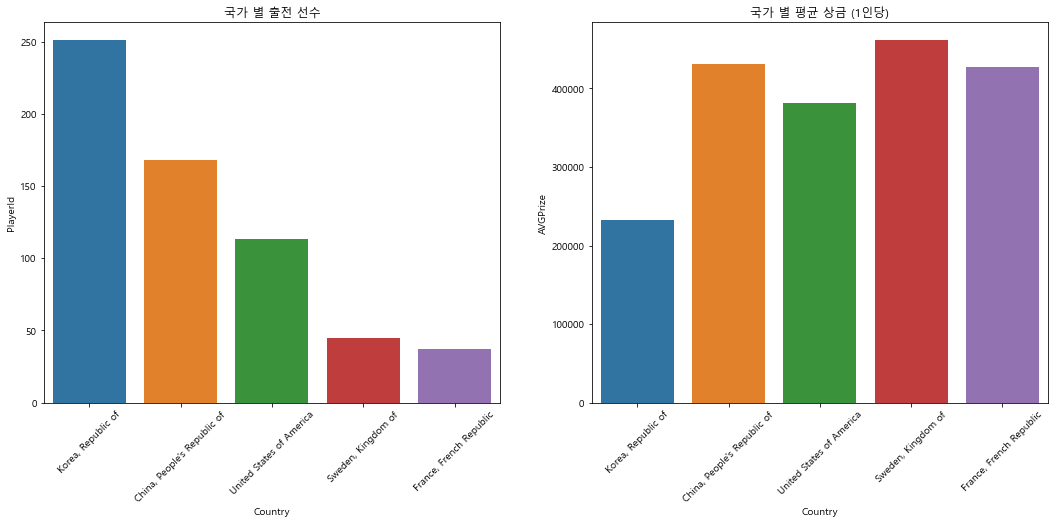

In [28]:
fig, ax= plt.subplots(1, 2, figsize= (18, 7))
a= sns.barplot(data= player_prize.sort_values(by= 'PlayerId', ascending= False).head(), x= 'Country', y= 'PlayerId', ax= ax[0])
a.set_title('국가 별 출전 선수')
a.set_xticklabels(labels= a.get_xticklabels(), rotation= 45)
# 출전 선수 상위 5개국
many_players= player_prize.sort_values(by= 'PlayerId', ascending= False).head()
b= sns.barplot(data= many_players, x= 'Country', y= 'AVGPrize', ax= ax[1])
b.set_title('국가 별 평균 상금 (1인당)')
b.set_xticklabels(labels= b.get_xticklabels(), rotation= 45)
plt.show()

* 출전 선수는 한국, 중국, 미국, 스웨덴, 프랑스 순으로 많음
* 이 국가들의 1인당 평균 상금을 보면 순위가 확연히 달라짐
* 평균 상금은 스웨덴, 중국, 프랑스, 미국, 한국 순으로 많음

### 2-1. 팀 별 평균 상금
* 출전 대회 1회 당 상금

In [29]:
# 팀 별 출전 횟수
team_join= teams.groupby(['TeamId','TeamName'])['TotalTournaments'].sum().reset_index()
# 팀 별 총 상금
team_prize= teams.groupby(['TeamId','TeamName'])['TotalUSDPrize'].sum().reset_index()

team_join.head()

,TeamId,TeamName,TotalTournaments
0,101,Evil Geniuses,392
1,102,Team Liquid,1296
2,103,Millenium,451
3,104,compLexity Gaming,396
4,106,Quantic Gaming,91


In [30]:
team_prize.head()

,TeamId,TeamName,TotalUSDPrize
0,101,Evil Geniuses,21662171.52
1,102,Team Liquid,33095692.87
2,103,Millenium,1358421.07
3,104,compLexity Gaming,2706945.61
4,106,Quantic Gaming,137582.67


In [31]:
team_tmp= pd.merge(left= team_join, right= team_prize, on= 'TeamId', how= 'left')
team_tmp.drop('TeamName_y', axis= 1, inplace= True)
team_tmp.rename(columns= {'TeamName_x' : 'TeamName'}, inplace= True)
team_tmp

,TeamId,TeamName,TotalTournaments,TotalUSDPrize
0,101,Evil Geniuses,392,21662171.52
1,102,Team Liquid,1296,33095692.87
2,103,Millenium,451,1358421.07
3,104,compLexity Gaming,396,2706945.61
4,106,Quantic Gaming,91,137582.67
...,...,...,...,...
500,24993,XSET,5,23200.00
501,24994,Cosa Nostra Games,3,4500.00
502,24995,vsBANDITS,1,2000.00
503,24996,Built By Gamers,5,35633.32


In [32]:
team_tmp['AVGPrize']= round(team_tmp['TotalUSDPrize']/ team_tmp['TotalTournaments'], 1)
print(team_tmp.shape)
team_tmp.head()

(505, 5)


,TeamId,TeamName,TotalTournaments,TotalUSDPrize,AVGPrize
0,101,Evil Geniuses,392,21662171.52,55260.6
1,102,Team Liquid,1296,33095692.87,25536.8
2,103,Millenium,451,1358421.07,3012.0
3,104,compLexity Gaming,396,2706945.61,6835.7
4,106,Quantic Gaming,91,137582.67,1511.9


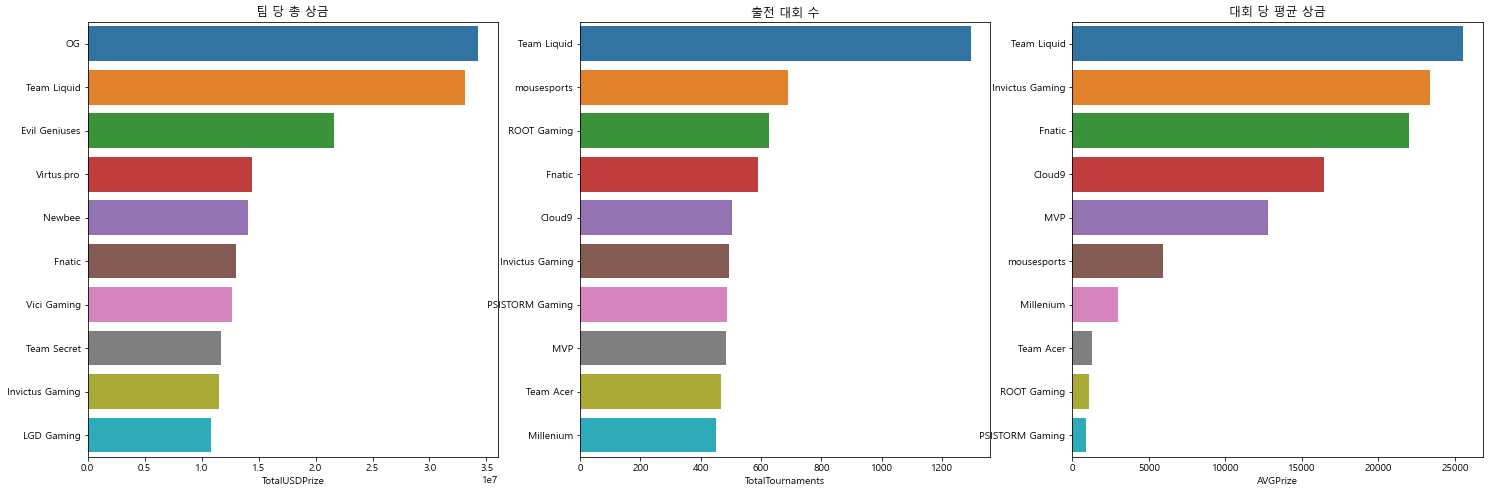

In [33]:
fig, ax= plt.subplots(1, 3, figsize= (25, 8))
# 팀 별 총 상금
a= sns.barplot(data= team_tmp.sort_values(by= 'TotalUSDPrize', ascending= False).head(10), x= 'TotalUSDPrize', y= 'TeamName', ax= ax[0])
a.set_title('팀 당 총 상금')
a.set_ylabel('')
# 팀 당 출전 경기 수 상위 10개 팀
b= sns.barplot(data= team_tmp.sort_values(by= 'TotalTournaments', ascending= False).head(10), x= 'TotalTournaments', y= 'TeamName', ax= ax[1])
b.set_title('출전 대회 수')
b.set_ylabel('')
# 이 팀들의 경기 당 평균 상금
most_joined_teams= team_tmp.sort_values(by= 'TotalTournaments', ascending= False).head(10).sort_values(by= 'AVGPrize', ascending= False)
c= sns.barplot(data= most_joined_teams, x= 'AVGPrize', y= 'TeamName', ax= ax[2])
c.set_title('대회 당 평균 상금')
c.set_ylabel('')
plt.show()

* 집계 기준 별 순위가 모두 다름
* 총 상금 1위였던 OG(유럽)은 출전 대회, 평균 상금 순위에서 벗어남
* Team Liquid(유럽)은 모든 기준에서 상위권을 기록
* 모든 게임에서 상위권을 기록한 팀과 특정 게임/대회에서 상위권을 기록한 팀이 있는 것으로 파악됨


### 3. 게임 별 상금 순위
* 지역, 팀 별로 집계

### 3-1. 대륙별 총 상금

In [34]:
players_1= players[['PlayerId', 'CountryCode', 'TotalUSDPrize', 'Game']]
country_1= country[['Continent_Name', 'Country_Name', 'Two_Letter_Country_Code']]

In [35]:
country_1.rename(columns= {'Two_Letter_Country_Code' : 'CountryCode'}, inplace= True)
country_1.CountryCode= country_1.CountryCode.str.lower()

player_country= pd.merge(left= players_1, right= country_1, on= 'CountryCode', how= 'left')
player_country.head()

,PlayerId,CountryCode,TotalUSDPrize,Game,Continent_Name,Country_Name
0,3883,dk,1822989.41,Counter-Strike: Global Offensive,Europe,"Denmark, Kingdom of"
1,3679,dk,1799288.57,Counter-Strike: Global Offensive,Europe,"Denmark, Kingdom of"
2,3885,dk,1787489.88,Counter-Strike: Global Offensive,Europe,"Denmark, Kingdom of"
3,3672,dk,1652350.75,Counter-Strike: Global Offensive,Europe,"Denmark, Kingdom of"
4,17800,dk,1416448.64,Counter-Strike: Global Offensive,Europe,"Denmark, Kingdom of"


In [36]:
player_country.rename(columns= {'Continent_Name' : 'Continent'}, inplace= True)
game_cont_prize= player_country.groupby(['Game', 'Continent'])['TotalUSDPrize'].sum().reset_index()
game_cont_prize.head()

,Game,Continent,TotalUSDPrize
0,Arena of Valor,Asia,8299761.83
1,Arena of Valor,North America,34190.60
2,Counter-Strike: Global Offensive,Asia,4776058.50
3,Counter-Strike: Global Offensive,Europe,41735319.21
4,Counter-Strike: Global Offensive,North America,8774160.74


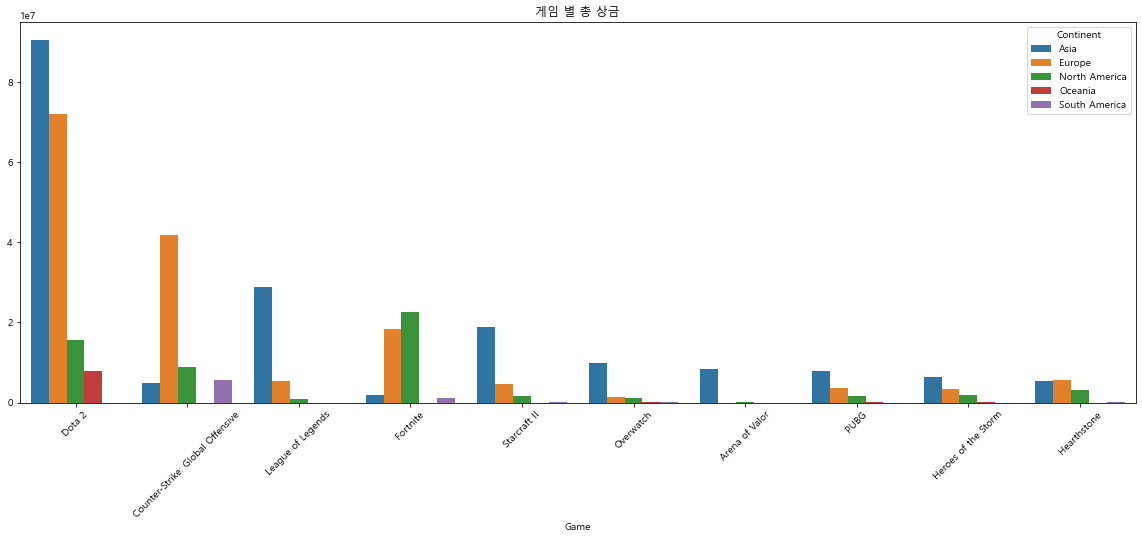

In [37]:
plt.figure(figsize= (20, 7))
plt.title('게임 별 총 상금')
a= sns.barplot(data= game_cont_prize.sort_values(by= 'TotalUSDPrize', ascending= False), x= 'Game', y= 'TotalUSDPrize', hue= 'Continent')
a.set_ylabel('')
plt.xticks(rotation= 45)
plt.show()

* 총 상금 기준 집계 결과, CS:GO(FPS)를 제외한 대부분의 게임에서 아시아가 취득 상금이 압도적으로 많음
* 유럽, 북미는 CS:GO(FPS), 포트나이트(배틀로얄), 하스스톤(전략 카드)에서 강세를 보임
* 총 상금을 기준으로 보면 아시아가 게임 강국이라는 것을 알 수 있음

### 3-2. 국가 별 상금 순위

In [38]:
player_country.head(3)

,PlayerId,CountryCode,TotalUSDPrize,Game,Continent,Country_Name
0,3883,dk,1822989.41,Counter-Strike: Global Offensive,Europe,"Denmark, Kingdom of"
1,3679,dk,1799288.57,Counter-Strike: Global Offensive,Europe,"Denmark, Kingdom of"
2,3885,dk,1787489.88,Counter-Strike: Global Offensive,Europe,"Denmark, Kingdom of"


In [39]:
player_country.rename(columns= {'Country_Name' : 'Country'}, inplace= True)

country_prize= player_country.groupby(['Game', 'Country'])['TotalUSDPrize'].sum().reset_index()
country_prize.head()

,Game,Country,TotalUSDPrize
0,Arena of Valor,"China, People's Republic of",4026577.14
1,Arena of Valor,"Korea, Republic of",691962.33
2,Arena of Valor,Malaysia,28860.00
3,Arena of Valor,Taiwan,1034909.94
4,Arena of Valor,"Thailand, Kingdom of",1798396.54


In [40]:
# 게임별 총 상금 순위
country_prize['PrizeRank']= country_prize.groupby('Game')['TotalUSDPrize'].rank(ascending= False)
country_prize

,Game,Country,TotalUSDPrize,PrizeRank
0,Arena of Valor,"China, People's Republic of",4026577.14,1.0
1,Arena of Valor,"Korea, Republic of",691962.33,5.0
2,Arena of Valor,Malaysia,28860.00,7.0
3,Arena of Valor,Taiwan,1034909.94,3.0
4,Arena of Valor,"Thailand, Kingdom of",1798396.54,2.0
...,...,...,...,...
186,Starcraft II,"Spain, Kingdom of",100271.58,17.0
187,Starcraft II,"Sweden, Kingdom of",363965.13,11.0
188,Starcraft II,Taiwan,290220.59,13.0
189,Starcraft II,Ukraine,127688.41,16.0


In [41]:
country_prize= country_prize[country_prize['PrizeRank']<= 10]
country_prize.head()

,Game,Country,TotalUSDPrize,PrizeRank
0,Arena of Valor,"China, People's Republic of",4026577.14,1.0
1,Arena of Valor,"Korea, Republic of",691962.33,5.0
2,Arena of Valor,Malaysia,28860.00,7.0
3,Arena of Valor,Taiwan,1034909.94,3.0
4,Arena of Valor,"Thailand, Kingdom of",1798396.54,2.0


In [42]:
country_prize.Game.nunique()

10

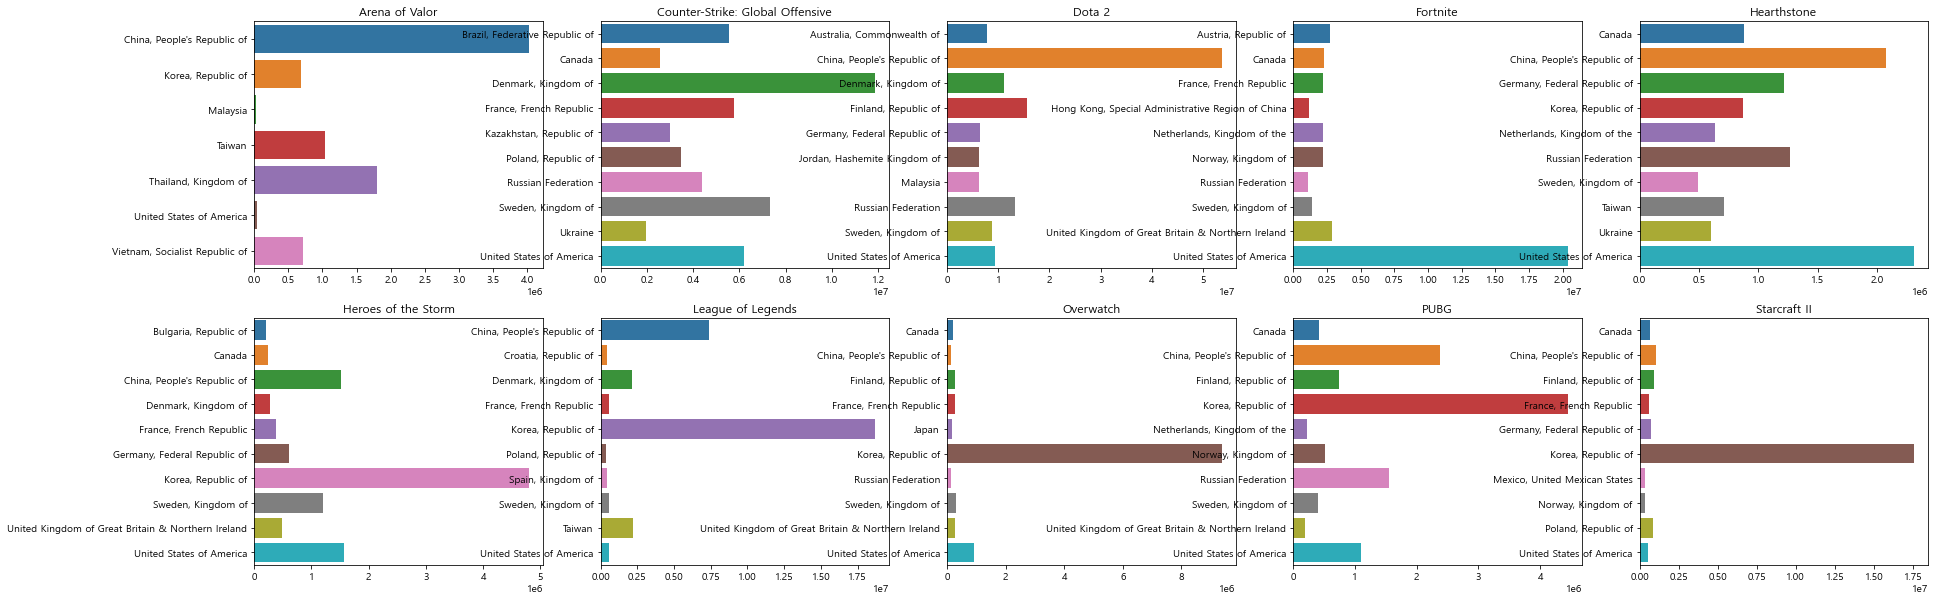

In [43]:
fig, ax= plt.subplots(2, 5, figsize= (30, 10))

game_list= country_prize.Game.unique().tolist()

for i in range(0, 10) :
    if i< 5 :
        sns.barplot(data= country_prize[country_prize['Game']== game_list[i]], x= 'TotalUSDPrize', y= 'Country', ax= ax[i// 5, i% 5])
        ax[i// 5, i% 5].title.set_text(game_list[i])
        ax[i// 5, i% 5].set_xlabel('')
        ax[i// 5, i% 5].set_ylabel('')
    else :
        sns.barplot(data= country_prize[country_prize['Game']== game_list[i]], x= 'TotalUSDPrize', y= 'Country', ax= ax[i// 5, i% 5])
        ax[i// 5, i% 5].title.set_text(game_list[i])
        ax[i// 5, i% 5].set_xlabel('')
        ax[i// 5, i% 5].set_ylabel('')

* 대부분의 게임에서 한국이 압도적으로 강세임
* 덴마크, 중국, 미국은 각각 CS:GO, 도타 2, 포트나이트/하스스톤에서 강세를 보임
* 앞서 가장 많은 상금을 탔던 OG, Team Liquid, Evil Genius는 적은 대회에서 큰 상금을 탄 것으로 추정됨

## 결론
* 대부분의 게임에서 한국이 게임 강국이라고 할 수 있음
* 한국이 출전 경기 수는 적지만 많은 게임에서 우승을 차지함
* 중국과 북미, 유럽이 그 뒤를 이음